In [1]:
import os
import cv2
import math
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = "./Crop"
target_size = (50, 50)

In [3]:
def load_images(data_path):
    images = []
    labels = []
    
    for dir in os.listdir(data_path):
        dir_file = os.path.join(data_path, dir)
        print(dir_file)
        for file in os.listdir(dir_file):
            print(file)
            if file[-3:] in {'jpg','png'}:
                img_path = os.path.join(dir_file, file)
                print(img_path.replace("\\","/"))
                img = cv2.imread(img_path.replace("\\","/"))
                img = cv2.resize(img, target_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append(img)
                labels.append(dir)
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

x, y = load_images(data_path)
x = x/255


FileNotFoundError: [WinError 3] The system cannot find the path specified: './Crop'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)


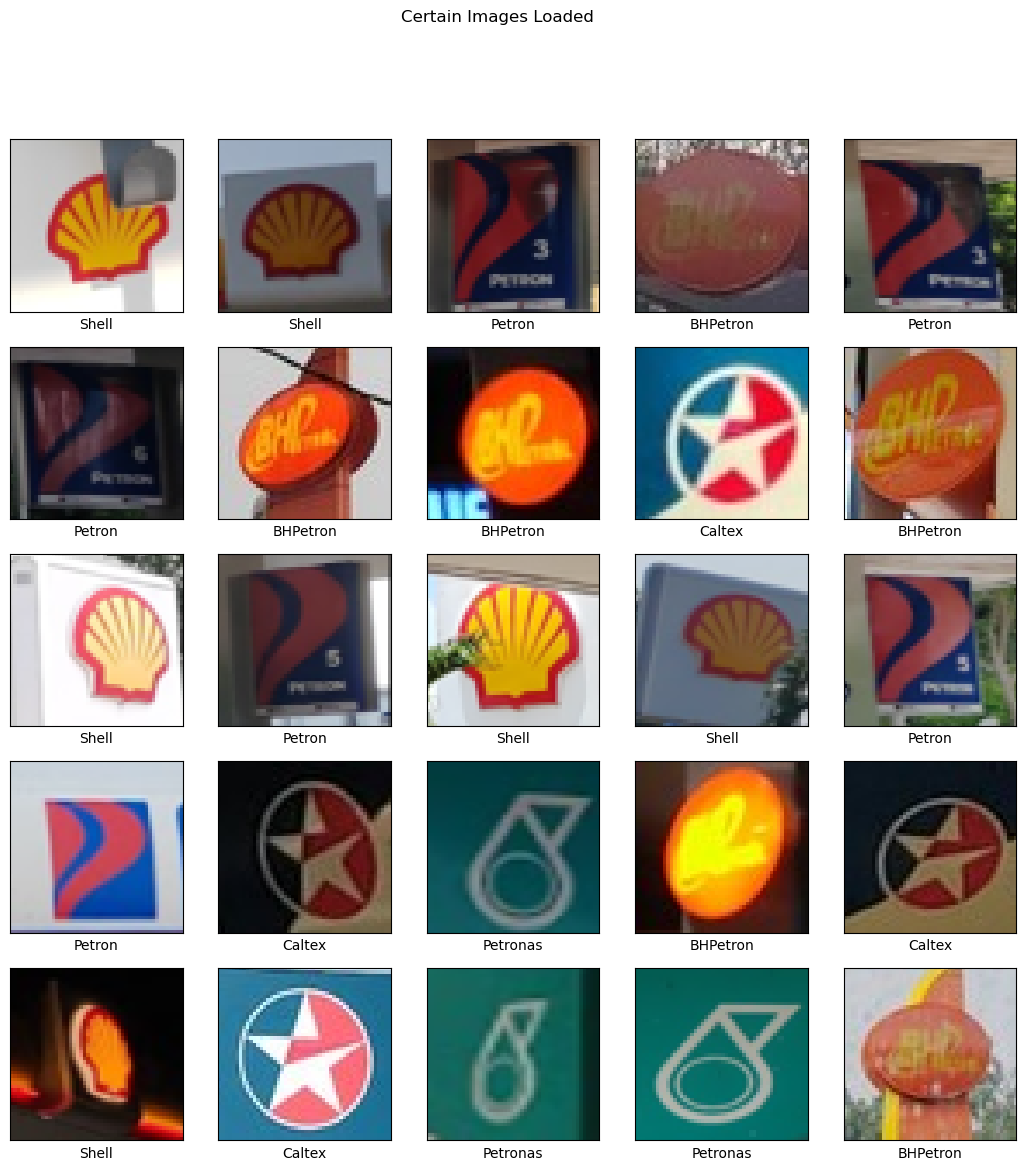

In [ ]:
fig = plt.figure(figsize=(13,13))
fig.suptitle('Certain Images Loaded')

for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])
plt.show()

In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0],-1)
x_test_flat = x_test.reshape(x_test.shape[0],-1)

print(x_train_flat.shape)
print(x_test_flat.shape)

(286, 7500)
(72, 7500)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(286, 50, 50, 3)
(286,)
(72, 50, 50, 3)
(72,)


In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

x_train_lda = lda.transform(x_train)
x_test_lda = lda.transform(x_test)

ValueError: Found array with dim 4. LinearDiscriminantAnalysis expected <= 2.

In [ ]:
param_grid = {
    'hidden_layer_sizes' : [(1000), (1000,500), (200,150,100), (350,250,200,100)],
    'max_iter' : [500, 700, 1000],
    'alpha' : [0.0001, 0.001, 0.01],
}

In [ ]:
mlp = MLPClassifier()

grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(x_train_lda, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [1000, (1000, 500),
                                                (200, 150, 100),
                                                (350, 250, 200, 100)],
                         'max_iter': [500, 700, 1000]})

In [ ]:
best_param = grid_search.best_params_
print(best_param)
best_model = grid_search.best_estimator_

{'alpha': 0.0001, 'hidden_layer_sizes': 1000, 'max_iter': 500}


In [ ]:
best_model.fit(x_train_lda,y_train)
y_pred = best_model.predict(x_test_lda)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy : ", accuracy)

Testing Accuracy :  0.9305555555555556


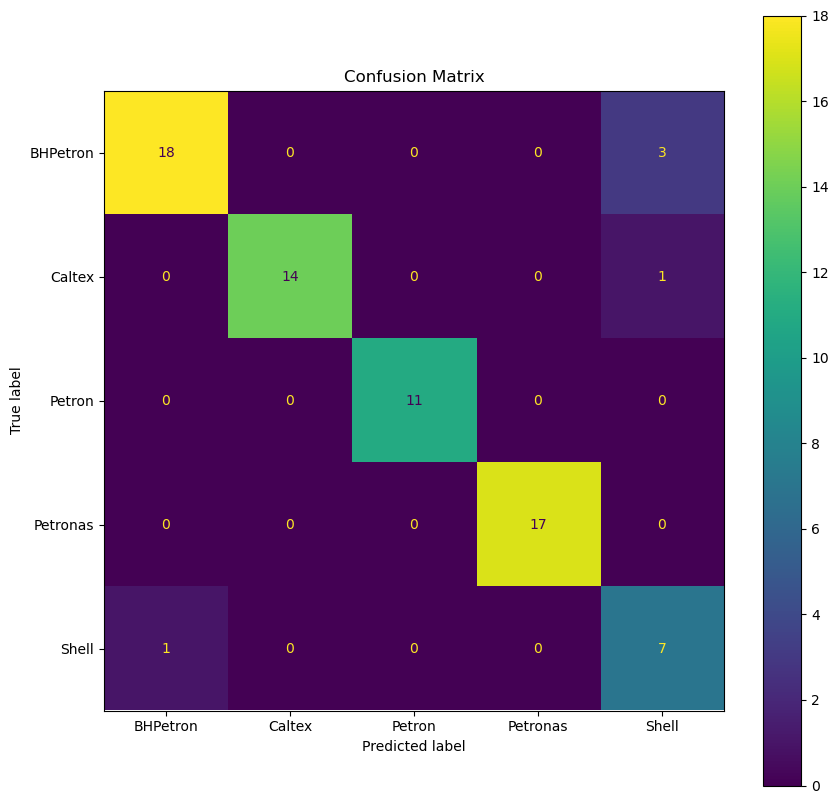

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Confusion Matrix")
disp.plot(ax=ax)
plt.show()